Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Есть задание - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
# Импорт библитек
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
# Прочитаем наш датафрейм
data = pd.read_csv('/datasets/games.csv')
# Рассмотрим общую информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим присланный файл с помощью метода info. Количество строк в нашем датафрейме - 16 715 и 11 столбцов. Сразу бросается в глаза что названия столбцов содержат буквы разного регистра, приведем все назвения к нижнему регистру.

In [2]:
# Приведение к нижнему регистру названий столбцов
data.columns = map(str.lower, data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# Посмотрим первые 10 строк нашего датафрейма
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


##### Теперь проанализируем столбцы.
1. Name - название игры. В данном столбце у нас пропущено два значения. По большому счету названия игр нам не сильно важно при дальнейшем анализе. Большее влияние будет иметь платформа, жанр, сборы, оценки и возрастной рейтинг. Поэтому их нужно либо исключить, либо заменить каким-нибудь названием (например: unknown_game). Тип столбца строковый, что собственно нам и надо.
2. Platform - платформа, для которой создавалась игра. Количество значений совпадает с общим количеством занчений в датафрейме (количество строк), значит пропусков нет. Тип данных строковый, опять же замена не требуется.
3. Year_of_release - год выхода игры. Сразу заметно 2 ньюанса - есть пропуски (269 строк пустуют), а так же тип данных - число с плавающей точкой, хотя год должен быть целочисленный. Пропущено у нас 1,6% от общего числа данных. Часть игр является мультиплатформенной, дргими словами можно найти повторяющиеся названия игр на разных платформах и если у какой либо платформы будетпропущен год релиза, то заменить его датой релиза на другой платформе. Но этот подхот не корректен. Во первых на рахных платформах игры могут выходить как в одно время, так и в разное. Примеры: игра The witche 3: wild hunt - вышла на XBox One, PS4 и PС, вроде, в 2013 году, а вот на Nintendo Switch только 2020, разница существенная. Другой пример пример - Horizon zero dawn, эксклюзив для PS4 вышел в 2015, в а 2020 его выпускабт на PC, или Red Dead Redemption 2, для консолей вышела в 2018, а на ПК в конце 2019. Вторая важная причина убрать строки с пропусками, а не делать замену - их очень мало. Пропуски это 1,6% от общего количества, а если смотреть на количество платформ - 31, то данное процентное соотношение и вовсем становится мизерным. Поэтому на мой взгляд лучшим решением будет исключить данные строки, потеря 1-2% от нашего датафрейма, практически никак не повлияет на конечные расчеты. После чистки нужно будет поменять тип столбца на целочисленный, и выглядеть будет лучше, и меньше места занимать будет итогвый файл, а значит и работать будет быстрее.
4. Genre - жанр игры. Тип стобца строквый, значит замена не нужна. Но есть два пропуска, скорее всего это те же строки где отсутствует название игры. Замену тут делать не целесообразно и не корректно, поэтому исключим эти два значения из обшего датафрейма, 2 значения от 16 тысяч это ничтожно малая велечина, которая никак не отразится на итоговой статистике.
5. NA_sales, EU_sales, JP_sales, Other_sales — продажи в Северной Америке, Европе, Японии и в других странах (миллионы долларов). Пропусков нет, тип стобцов соответствует нужному, все хорошо.
6. Critic_score - оценка критиков (максимум 100). Тип столбца float64, нужно рассмотеть данный столбец по подробнее, если у значений в нем дробная часть всегда равна 0, то имеет смысл поменять на челочисленный тип. Так же есть пропуски, причем довольно много - 51% от обещго количества, что является проблемой. Исключить такое количество мы не можем. Если исключить, то мы можем при дальнейшем анализе "потерять" какие либо платформы или жанры, а даже если не потеряем, то разультаты могут сильно исказиться, так как будут рассчитаны по сужщественно меньшему количеству значений. Значит нужно заполнять пропуски. Самый простой способ это почитать среднюю оценку и заполнить ею все пропущенные значения. Простой, но не самый лучший, так как сильно усреднит итоговые занчения. Ведь прествелнные игры имебт разный жанр, разный возрастной рейтинг, разные платформы и разные года выхода игр. И игры которые выходили в 90-х оценивались совсем по разному, чем игры, которые выходили в 2000-х. Значит и замену лучше сделать по группам. Например создать словарь, где будет для каждого года записана среднняя оценка критиков, а затем с помощью функции сделать замену пропусков по каждому году.
7. User_score - оценка пользователей (максимум 10). Тип столбца нужно поменять на float64, так как в оценках присутствуют значения с цифрами после запятой (изначально тип столбца - строковый). В данном столбце так же есть пропуски, и опять их довольно много - 40%. Исключать столько значений нельзя, поэтому нужно будет сделать замену по такому же принципу как и с оценками критиков.
8. Rating - рейтинг от организации ESRB. Тип столбца строковый, значения в нем буквенные, значит менять не нужно. Опять много пропусков - 40,5%. Опять нужны замены. Так как значения в столбце буквенные, то кажому уникальному значению этого столбца присвоим цифру, высчитаем среднее, и полученное значение переведем обратно в буквы, чтобы заменить пропуски. Для данного столбца, логично кажется делать группировку не по году выходы игры, а по платформе или жанру игры. Почему так - возьмем к примеру nintendo wii. Данная платформа расчитана на детей младшего возраста и на ней выходят игры с соответствующим возрастным рейтингом. А вот playstation 4 или xbox one - это игоровые консоли для подростков и взрослых людей, и игры на них выходят с рейтингом для этих возрастных групп. Второй подход - это использовать для группировки жанр игры. Каждому жанру в играх, чаще всего соответствует определенный возрастной рейтинг. Наприер в "гонках", спортивных играх, в подавляющем большинстве случаев, нет насилия, эротических сцен и перестрелок - возрастной рейтинг в таких играх очень редко бывает высоким. А вот в RPG, Шутерах - все выше сказанное часто присутствует, и возрастной рейтинг, чаще всего, либо достаточно высокий, либо вообще максимальный. Поэтому для замены лучше использовать как ориентир - жанр игр.

## Шаг 2. Подготовка данных

Уберем строки, где пропущено название игры и ее жанр, отсутствует год выпуска игры, поменяем типы данных столбцов "год выпуска" и "пользотельские оценки"

In [4]:
# Убираем две строки, где не было назначния и жанра игры
data = data.dropna(subset=['genre'])
# Убираем игры у которых не заполнен год выпуска
data = data.query('year_of_release > 0')
# Делаем замену типа данных в толбце год выпуска
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('Int64')
# проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null Int64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: Int64(1), float64(4), int64(1), object(5)
memory usage: 1.5+ MB


Помимо цифровых значений в столбце "пользотельские оценки" есть еще буквенные - аббревиатура "tbd". Она означает что рейтинг находится в состоянии рассчета/неопределен. Поэтому при замене типа данных столбца со строкового на float у нас выходит ошибка: "could not convert string to float: 'tbd'".
Заменим все пропущенные значения и значения "tbd" на 0, так как неопределенный рейтинг это все равно что пропущенное значение в столбце с рецйтингом, не дает никакой полезной информации. В дальнейшем все нули поменяем на средние значения рейтинга по жанрам.

In [5]:
data.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


In [6]:
# Замена рейтинга tbd на NaN
data['user_score'].replace('tbd', np.nan, inplace=True)
# проверка
data.query('name == "Zumba Fitness"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,NaN,E
669,Zumba Fitness,X360,2010,Sports,1.74,0.45,0.0,0.18,42,5.5,E
3516,Zumba Fitness,PS3,2010,Sports,0.28,0.21,0.0,0.08,NaN,3.8,E


In [7]:
# Замена типа столбца "пользотельских оценок" со строкового на дробный
data['user_score'] = data['user_score'].astype('float64')
# Сборс индексов датафрейма
data.reset_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
index              16444 non-null int64
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null Int64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: Int64(1), float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Теперь сгруппируем наши данные по годам и рассичтаем среднюю оценку у критиков.

In [8]:
data.groupby('year_of_release')['critic_score'].mean()

year_of_release
1980          NaN
1981          NaN
1982          NaN
1983          NaN
1984          NaN
1985    59.000000
1986          NaN
1987          NaN
1988    64.000000
1989          NaN
1990          NaN
1991          NaN
1992    85.000000
1993          NaN
1994    69.000000
1995          NaN
1996    89.875000
1997    85.294118
1998    81.821429
1999    75.769231
2000    69.349650
2001    71.414110
2002    69.046252
2003    70.181197
2004    69.393939
2005    68.819847
2006    67.338710
2007    66.180636
2008    65.904895
2009    67.554531
2010    67.482000
2011    68.692000
2012    72.984424
2013    71.278388
2014    71.065134
2015    72.871111
2016    73.155172
Name: critic_score, dtype: float64

Использование замены на средние значения сгруппированные по годам, не представляется возможным, так как есть года, за которые у нас нет информации об оценках. Это связано скорее всего с тем, что сама организации ESRB была основана только в 1994 году (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board), и пропуски у нас, как раз, с 1980 до 1995.
Значит для дальнейшей замены будем использовать будем использовать группировку по жанру, как было предложено для столбца с возрастным рейтингом.

Сгруппиуем наши данные по жанру и посчитаем среднее значение по столбцу "оценки критиков".

In [9]:
genre_critic_score_mean = data.groupby('genre')['critic_score'].mean()
genre_critic_score_mean

genre
Action          66.676931
Adventure       65.268750
Fighting        69.155556
Misc            66.648330
Platform        68.124490
Puzzle          67.231818
Racing          68.006897
Role-Playing    72.655267
Shooter         70.260022
Simulation      68.609195
Sports          71.993133
Strategy        72.158784
Name: critic_score, dtype: float64

Есть одна не состыковка. В столбце "оценка критиков" все значения целые, а в полученной сгруппированной таблице у нас нет ни одного целого числа. Полученные значения нужно будет округлить до целых, используя функцию round() библиотеки numpy. Данная функция выполняет равномерное (банковское) округление до указанной позиции к ближайшему четному числу, что собственно нам и нужно, и сразу преобразуем в целочисленный тип.

In [10]:
genre_critic_score_mean = genre_critic_score_mean.round().astype('Int64')
genre_critic_score_mean

genre
Action          67
Adventure       65
Fighting        69
Misc            67
Platform        68
Puzzle          67
Racing          68
Role-Playing    73
Shooter         70
Simulation      69
Sports          72
Strategy        72
Name: critic_score, dtype: Int64

Создадим словарь из наших сгруппирвоанных данных

In [11]:
dict_critic_score_mean = genre_critic_score_mean.to_dict()
dict_critic_score_mean

{'Action': 67,
 'Adventure': 65,
 'Fighting': 69,
 'Misc': 67,
 'Platform': 68,
 'Puzzle': 67,
 'Racing': 68,
 'Role-Playing': 73,
 'Shooter': 70,
 'Simulation': 69,
 'Sports': 72,
 'Strategy': 72}

Обнулим все пропущенные значения чтобы функция обработала нули и заменила их усредененными значениям, а затем напишем функцию для замены все пропусков

In [12]:
# Обнулим все пропущенные значения чтобы функция обработала нули и заменила их усредененными значениями
data['critic_score'] = data['critic_score'].replace(np.nan, 0)

# Создаем функицю для замены пропусков в столбце "оценка критиков"
def critic_score_replace(row):
    # вводим переменные для этой функции, которые нужны будут при расчете
    genre = row['genre']
    critic_score = row['critic_score']
    changer = 0
    # Цикл определения жанра и нулевого рейтинга
    if genre == 'Action' and critic_score == 0:
        changer = dict_critic_score_mean['Action']
    
    elif genre == 'Adventure' and critic_score == 0:
        changer = dict_critic_score_mean['Adventure']
    
    elif genre == 'Fighting' and critic_score == 0:
        changer = dict_critic_score_mean['Fighting']   
    
    elif genre == 'Misc' and critic_score == 0:
        changer = dict_critic_score_mean['Misc']    
    
    elif genre == 'Platform' and critic_score == 0:
        changer = dict_critic_score_mean['Platform']    
    
    elif genre == 'Puzzle' and critic_score == 0:
        changer = dict_critic_score_mean['Puzzle']    
    
    elif genre == 'Racing' and critic_score == 0:
        changer = dict_critic_score_mean['Racing']    
    
    elif genre == 'Role-Playing' and critic_score == 0:
        changer = dict_critic_score_mean['Role-Playing']    
    
    elif genre == 'Shooter' and critic_score == 0:
        changer = dict_critic_score_mean['Shooter']  
    
    elif genre == 'Simulation' and critic_score == 0:
        changer = dict_critic_score_mean['Simulation']    
    
    elif genre == 'Sports' and critic_score == 0:
        changer = dict_critic_score_mean['Sports']    
    
    elif genre == 'Strategy' and critic_score == 0:
        changer = dict_critic_score_mean['Strategy']
    
    else: # если рейтинг не нулевой, то присваиваем значение которое было изначально
         
        changer = critic_score
    
    return changer

# Добавим новую колонку "replaced_rating" в наш датафрейм, в которую перезапишем известные значения,
# а все пропуски заменим на усреденнеые рейтинги по жанрам
data['critic_score_replace'] = data.apply(critic_score_replace, axis=1)
data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_replace
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,76
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,NaN,68
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,82
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,80
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,NaN,73


Аналогично проделаем те же шаги для второй колонки - "пользовательские оценки", сгуппируем по жанру, посчитаем среднее и создадим словарь. В отличии от столбца с "оценками критиков", в столбце с "пользовательскими оценками" у нас содержатся дробные числа, содержащие 1 значнение после зяпятой, поэтому округлять будем соответствующим образом.

In [13]:
# Грппируем, считаем среднее и округляем
genre_user_score_mean = data.groupby('genre')['user_score'].mean().round(decimals = 1)
# Создаем словарь
dict_user_score_mean = genre_user_score_mean.to_dict()
dict_user_score_mean

{'Action': 7.1,
 'Adventure': 7.1,
 'Fighting': 7.3,
 'Misc': 6.8,
 'Platform': 7.3,
 'Puzzle': 7.1,
 'Racing': 7.0,
 'Role-Playing': 7.6,
 'Shooter': 7.1,
 'Simulation': 7.1,
 'Sports': 7.0,
 'Strategy': 7.3}

In [14]:
# Обнулим все пропущенные значения чтобы функция обработала нули и заменила их усредененными значениями
data['user_score'] = data['user_score'].replace(np.nan, 0)

# Создаем функицю для замены пропусков в столбце "оценка критиков"
def user_score_replace(row):
    # вводим переменные для этой функции, которые нужны будут при расчете
    genre = row['genre']
    user_score = row['user_score']
    changer = 0
    # Цикл определения жанра и нулевого рейтинга
    if genre == 'Action' and user_score == 0:
        changer = dict_user_score_mean['Action']
    
    elif genre == 'Adventure' and user_score == 0:
        changer = dict_user_score_mean['Adventure']
    
    elif genre == 'Fighting' and user_score == 0:
        changer = dict_user_score_mean['Fighting']   
    
    elif genre == 'Misc' and user_score == 0:
        changer = dict_user_score_mean['Misc']    
    
    elif genre == 'Platform' and user_score == 0:
        changer = dict_user_score_mean['Platform']    
    
    elif genre == 'Puzzle' and user_score == 0:
        changer = dict_user_score_mean['Puzzle']    
    
    elif genre == 'Racing' and user_score == 0:
        changer = dict_user_score_mean['Racing']    
    
    elif genre == 'Role-Playing' and user_score == 0:
        changer = dict_user_score_mean['Role-Playing']    
    
    elif genre == 'Shooter' and user_score == 0:
        changer = dict_user_score_mean['Shooter']  
    
    elif genre == 'Simulation' and user_score == 0:
        changer = dict_user_score_mean['Simulation']    
    
    elif genre == 'Sports' and user_score == 0:
        changer = dict_user_score_mean['Sports']    
    
    elif genre == 'Strategy' and user_score == 0:
        changer = dict_user_score_mean['Strategy']
    
    else: # если рейтинг не нулевой, то присваиваем значение которое было изначально
           
        changer = user_score
    
    return changer

# Добавим новую колонку "replaced_rating" в наш датафрейм, в которую перезапишем известные значения,
# все пропуски заменим на усреденнеые рейтинги по жанрам
data['user_score_replace'] = data.apply(user_score_replace, axis=1)
data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_replace,user_score_replace
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,76,8.0
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN,68,7.3
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,82,8.3
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,80,8.0
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN,73,7.6


Теперь приступим к обработке столбца с возрастным рейтингом. Значения у нас в данном столбце буквеные, поэтому среднее рассчитать не получится. Для рассчета среднего значения при группировке по жанрам, нунжно присвоить кажой букве рейтинга цифровое значение. Тогда мы сможем получить среднее значение, округлив которое, поймем какую категорию возрастного рейтинга нужно будет вставить в пропущенные значения. Значение "К-А" заменим на "Е", так как это одна и таже категория, да к тому же "К-А" не использутеся с 1998 года.

Обнулим все пропущенные значения чтобы функция обработала нули и заменила их усредененными значениям, а затем напишем функцию для замены все пропусков.

In [15]:
# Замена значений и просмотр уникальных значений столбца
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
# Создание нового столбца где каждая буква заменена на цифру
data['rating_number'] = data['rating'].replace(
    ['EC', 'E', 'E10+', 'T', 'M', 'AO', 'RP'],[1, 2, 3, 4, 5, 6, 7]
)
# меняем тип данных столбца на целочисленный
data['rating_number'] = data['rating_number'].astype('Int64')
data.head(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_replace,user_score_replace,rating_number
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,76,8.0,2
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN,68,7.3,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,82,8.3,2
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,80,8.0,2
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN,73,7.6,NaN
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,NaN,67,7.1,NaN
6,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,89,8.5,2
7,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,58,6.6,2
8,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,87,8.4,2
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,NaN,70,7.1,NaN


In [17]:
# Делаем группировку и округляем значения
genre_rating_number_mean = data.groupby('genre')['rating_number'].mean().round().astype('Int64')
# делаем замену цифровых значений на буквы
genre_rating_number_mean = genre_rating_number_mean.replace(
    [1, 2, 3, 4, 5, 6, 7], ['EC', 'E', 'E10+', 'T', 'M', 'AO', 'RP'])
# создаем словарь
dict_rating_number_mean = genre_rating_number_mean.to_dict()
dict_rating_number_mean

{'Action': 'T',
 'Adventure': 'E10+',
 'Fighting': 'T',
 'Misc': 'E10+',
 'Platform': 'E',
 'Puzzle': 'E',
 'Racing': 'E10+',
 'Role-Playing': 'T',
 'Shooter': 'T',
 'Simulation': 'E10+',
 'Sports': 'E',
 'Strategy': 'E10+'}

In [18]:
# Обнулим все пропущенные значения чтобы функция обработала нули и заменила их усредененными значениями
data['rating'] = data['rating'].replace(np.nan, 0)

# Создаем функицю для замены пропусков в столбце "возрастной рейтинг"
def rating_replace(row):
    
    # вводим переменные для этой функции, которые нужны будут при расчете
    genre = row['genre']
    rating = row['rating']
    changer = 0
    
    # Цикл определения жанра и нулевого рейтинга
    if genre == 'Action' and rating == 0:
        changer = dict_rating_number_mean['Action']
    
    elif genre == 'Adventure' and rating == 0:
        changer = dict_rating_number_mean['Adventure']
    
    elif genre == 'Fighting' and rating == 0:
        changer = dict_rating_number_mean['Fighting']   
    
    elif genre == 'Misc' and rating == 0:
        changer = dict_rating_number_mean['Misc']    
    
    elif genre == 'Platform' and rating == 0:
        changer = dict_rating_number_mean['Platform']    
    
    elif genre == 'Puzzle' and rating == 0:
        changer = dict_rating_number_mean['Puzzle']    
    
    elif genre == 'Racing' and rating == 0:
        changer = dict_rating_number_mean['Racing']    
    
    elif genre == 'Role-Playing' and rating == 0:
        changer = dict_rating_number_mean['Role-Playing']    
    
    elif genre == 'Shooter' and rating == 0:
        changer = dict_rating_number_mean['Shooter']  
    
    elif genre == 'Simulation' and rating == 0:
        changer = dict_rating_number_mean['Simulation']    
    
    elif genre == 'Sports' and rating == 0:
        changer = dict_rating_number_mean['Sports']    
    
    elif genre == 'Strategy' and rating == 0:
        changer = dict_rating_number_mean['Strategy']
    
    else: # если рейтинг не нулевой, то вне зависимости от тарифа, присваиваем значение которое было
          # изначально
        changer = rating
    
    return changer

# Добавим новую колонку "replaced_rating" в наш датафрейм, в которую перезапишем известные значения,
# все пропуски заменим на усреденнеые рейтинги по жанрам
data['replaced_rating'] = data.apply(rating_replace, axis=1)
data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_replace,user_score_replace,rating_number,replaced_rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,76,8.0,2,E
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,0,68,7.3,NaN,E
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,82,8.3,2,E
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,80,8.0,2,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,0,73,7.6,NaN,T


In [19]:
# Создаем новый датафрейм, убираем лишние столбцы
good_data = data.drop(
    ['critic_score', 'user_score', 'rating', 'rating_number', 'index'],
    axis='columns'
)
# сбрасываем индексы в новой таблице
good_data.reset_index(inplace=True, drop=True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name                    16444 non-null object
platform                16444 non-null object
year_of_release         16444 non-null int64
genre                   16444 non-null object
na_sales                16444 non-null float64
eu_sales                16444 non-null float64
jp_sales                16444 non-null float64
other_sales             16444 non-null float64
critic_score_replace    16444 non-null int64
user_score_replace      16444 non-null float64
replaced_rating         16444 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


Итог, у нас получился готовый для анализа датафрейм, с обработанными данными и убранными пропусками. Далее посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [20]:
# Создаем новый столбец в нашем датафрейме "sum_sales" куда поместим суммарные значения по продажам
# по кажой игре
good_data['sum_sales'] = good_data['na_sales'] + good_data['eu_sales'] \
+ good_data['jp_sales'] + good_data['other_sales']
good_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score_replace,user_score_replace,replaced_rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68,7.3,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,73,7.6,T,31.38


#### Вывод

Была рассмотрена и проанализирована присланная база данных. Были обработаны пропуски и ошибки, в частности:
- приведены названия столбцов к нижнему регистру;
- Изменены типы столбцов;
- Исключены пропуски которе не целесообразно было заменять;
- Произведена замена пропусков по ряду столбцов;
- Посчитана суммарные продажи в мире по каждой игре.

## Шаг 3. Исследовательский анализ данных

Ну что ж, начнем исследовать наши данные. Посмотрим сколько игр выпускалось в разные годы. Для этого сформируем таблицу через группировку, а так же построим гистограмму.

In [21]:
# Сгуппируем данные по году и посчитаем количество игр выпускаемое за каждый год
good_data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

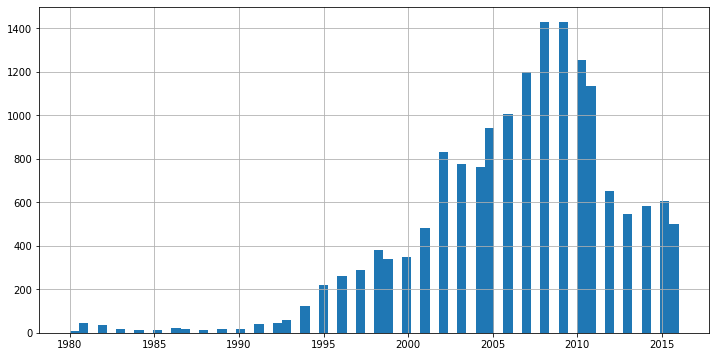

In [22]:
# Построим гистограмму
good_data['year_of_release'].hist(bins='auto', figsize=(12, 6), 
                        range=(good_data['year_of_release'].min(),\
                               good_data['year_of_release'].max()))

Как видим, до 94 года было "затишье". С 94 поше рост, а с 2004-го как будто "с цепи сорвались" прямиком до 2009-го, 10-11 годы незначительный спад, далее уже более существенный. С 2012 года вышли на плато. В общем то ситуация ожидаемая и закономерная. В 90-е и начало 2000-х была эпоха приставок. До сих поп вспоминаю как на оной дискете для сеги умещалось более 1000 игр. Но с годами игры становятся более сложными, графика улучшается, текстуры выглядят все более реалистично, но растет и размер игр. Современные игровые проекты уровня ААА редко весят меньше 50 Гб, а зачастую приближаются к 100 Гб. На разработку такого сложного массивного кода и текстур тратятся немалые деньги, зачастую сумма затраченная на разработку ААА-проекта (Red Dead Redemption 2, Metro: Exodus, The Witcher 3: Wild Hunt) сравнима с голивудским блокбастером. Как следствие у студий нет столько денег, чтобы производить такие игры в "промышленных" масштабах, а у потребителей нет столько денег, покупать такое количество игр. (Игра уровня ААА на ПК стоит 2,5 тыс. рублей, а для приставок PS4 или XBOX One - 4,5 тыс. рублей соответственно) Вторая причина спада, игры уровня ААА не запустить на старых игровых платформах, "желозо" просто не сможет запустить и обработать весь этот код. Вот поэтому мы видим спад с 2012 года. С 2012 по 2015 видим небольшой прирост, это вызвано выходом консолей нового поколения PlayStation 4 и XBOX One. На замену старым игровым платформам приходят новые, которые позволяют разработчикам выпускать больше новых игр.

Посмотрим, как менялись продажи по платформам. Для этого построим сводную таблицу и график.

In [23]:
# Создаем сводную таблицу
pd.set_option('display.max_columns', None)
platform_pivot = good_data.pivot_table(index=['year_of_release'], columns=['platform'],\
                          values='sum_sales', aggfunc='sum')
platform_pivot

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,53.44,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,NaN,45.01,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


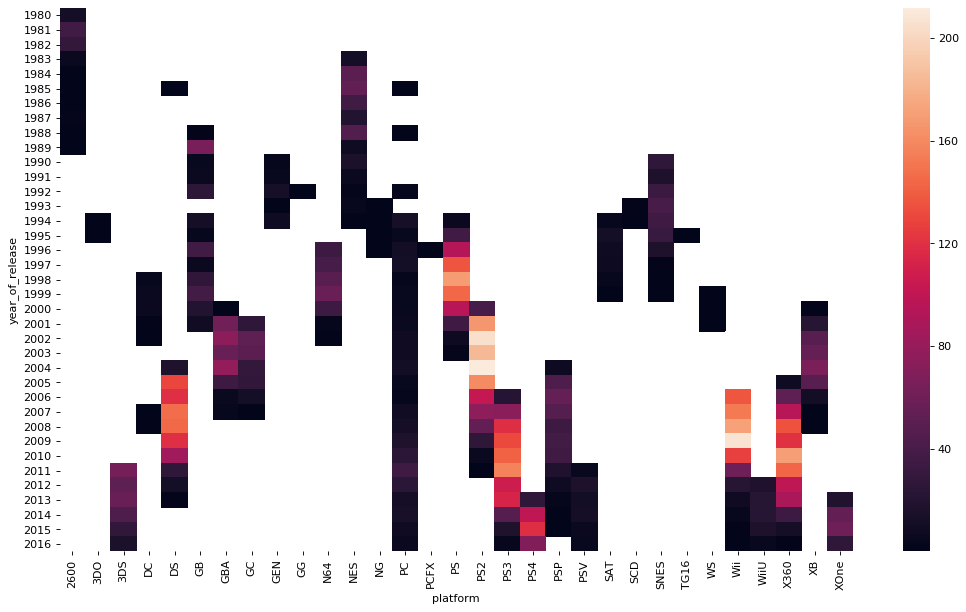

In [24]:
# Построение графика
plt.figure(figsize=(16,9), dpi= 80)
sns.heatmap(platform_pivot)

На графике наглядно видно, "рассвет", "закат" и "жизненый путь" каждой игровой платформы. Конкретные цифры можно подчерпнуть из сводной таблицы что построена чуть выше.

Выберем топ 10 платформ с наибольшими суммарными продажами и построим распределение по годам.

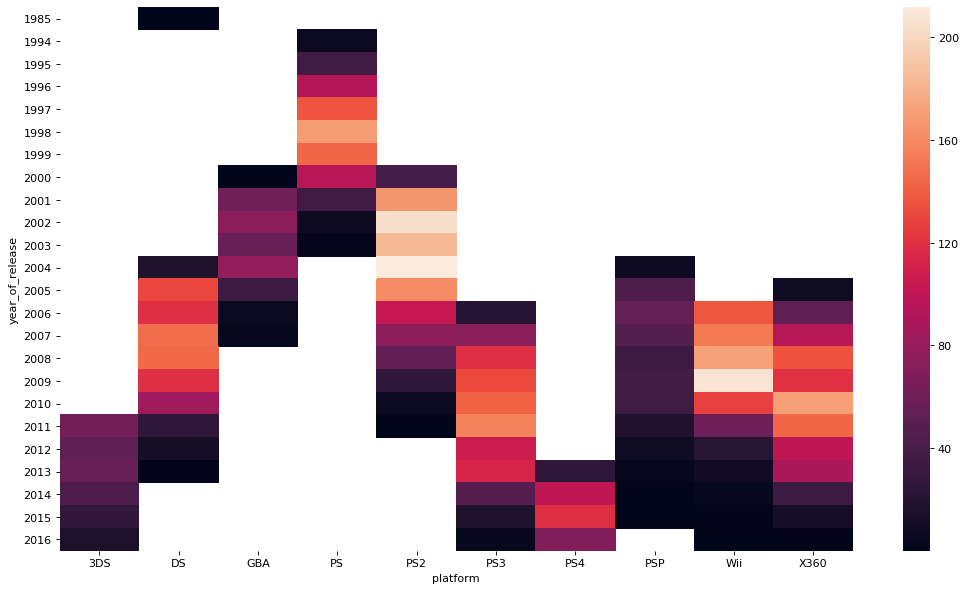

In [25]:
# Сделаем сводную таблицу по суммарным продажам на каждую игровую платформу
platform_pivot = good_data.pivot_table(index='platform', values='sum_sales',\
                                        aggfunc='sum').sort_values('sum_sales',\
                                                                     ascending=False)
# Отберем первые топ-10
platform_pivot = platform_pivot.head(10)
# Создаем переменную, куда запишем названия топ-10 игровых платформ по суммарным продажам
top_platform_name = platform_pivot.index

# Создаем новый датафрейм все данные только по топ-10 платформ
top10_platform = good_data.query('platform in @top_platform_name')
# Далаем сводную таблицу по годам по топ-10 платформ
top10_platform_pivot = top10_platform.pivot_table(index=['year_of_release'], columns=['platform'],\
                          values='sum_sales', aggfunc='sum')
# Построение графика
plt.figure(figsize=(16,9), dpi= 80)
sns.heatmap(top10_platform_pivot)

За какой же характерный срок появляются новые и исчезают старые платформы? Для ответа на этот вопрос нужно считать среднее значение по всем платформам по разнице между последним годом релиза игр и первым годом релиза.

In [26]:
# Сделаем сводную таблицу, где будет по каждой платформе указан первый и последний год релиза игр
live_circle_pivot = good_data.pivot_table('year_of_release', 'platform', aggfunc=('min', 'max'))
# Добавим столбец где рассчитаем срок "жизни" платформы
live_circle_pivot['live_circle'] = live_circle_pivot['max'] - live_circle_pivot['min'] + 1
# Переименуем столбцы
live_circle_pivot.columns = ['last_year_release_game', 
                             'first_year_release_game', 
                            'live_circle_platform']
live_circle_pivot

,last_year_release_game,first_year_release_game,live_circle_platform
platform,,,
2600,1989,1980,10
3DO,1995,1994,2
3DS,2016,2011,6
DC,2008,1998,11
DS,2013,1985,29
GB,2001,1988,14
GBA,2007,2000,8
GC,2007,2001,7
GEN,1994,1990,5


In [27]:
# Поситаем среднее значние столбца "жизненного цикла" по всем платформам
live_circle_pivot['live_circle_platform'].mean()

8.612903225806452

В итоге получаем, что по среднему значению у нас платформа "живет" примерно 8-9 лет. И действиетльно, взять за пример консоли PS3 и PS4. PS3 вышла в далеком 2006 году, PS4 - в 2013 - 7 лет разницы. Но разработчики игр в выходом новых консолей не забывают и про старые, например для PS3 и по сей день выпускают игры, правда они совсем простые, так как железо у приставки по сегодняшним меркам слобое, и о новых ААА проектах для старых консолей можно забыть. Если посмотреть на график распределения продаж по годам для топ-10 платформ, то видим переходный момент для PS3 и PS4 в 2013-14 годах. в 2014 PS3 начала проседать, а с 2015 и вовсе скатилась вниз по продажам. "Закат" случился за 8-9 лет.

#### Актуальный период для анализа. 

Период возьмем начиная с 2012 года по 2016 год. Именно в 2012 году случился "обвал" по количеству кличеству игр, с 2013 года появляются новые консоли, а к 2012 все не актуальные платформы перестали выпускать новые игры.

Создадим новый датафрейм для анализа. Посмотрим какие платформы лидируют по продажам, растут или падают.

In [28]:
# Формируем новый "актуальный" датафрейм 
actual_data = good_data.query('year_of_release > 2011')
actual_data.reset_index(inplace=True, drop=True)
actual_data 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score_replace,user_score_replace,replaced_rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,70,7.1,T,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,73,7.6,T,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,65,7.1,E10+,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,67,6.8,E10+,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,67,7.1,T,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,65,7.1,E10+,0.01


#### Посмотрим какие платформы лидируют по продажам, растут или падают?

У нас есть спикок из 10 платформ актуальных за период начиная с 2012 года. Создадим сводную таблицу где по каждой из платформ будут посчитаны суммарные продажи.

In [29]:
# Создаем сводную таблицу
lead_platform = actual_data.pivot_table('sum_sales', 'platform', aggfunc='sum')
lead_platform

,sum_sales
platform,
3DS,194.61
DS,12.55
PC,62.65
PS3,288.79
PS4,314.14
PSP,11.19
PSV,49.18
Wii,35.37
WiiU,82.19


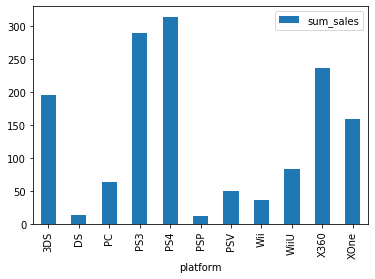

In [30]:
# Нарисуем график для наглядности
lead_platform.plot(kind='bar')

Как видно из таблицы и графика мы можем определить платформы-лидеры по продажам.

Топ 5 по продажам: PS4, PS3, XBOX 360, Nintendo 3DS, XBOX One.

Но как меняются показатели этих платформ с течением выбранного нашего временного промежутка.
Построим сводную таблицу и график для наглядности.

In [31]:
# Создание сводной таблицы
dynamic_lead_platform = actual_data.pivot_table(
    index='platform',
    columns='year_of_release',
    values='sum_sales',
    aggfunc='sum'
)
# Переименывываем столбцы
dynamic_lead_platform.columns = ['2012', '2013', '2014', '2015', '2016']
dynamic_lead_platform

,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,NaN,NaN,NaN
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


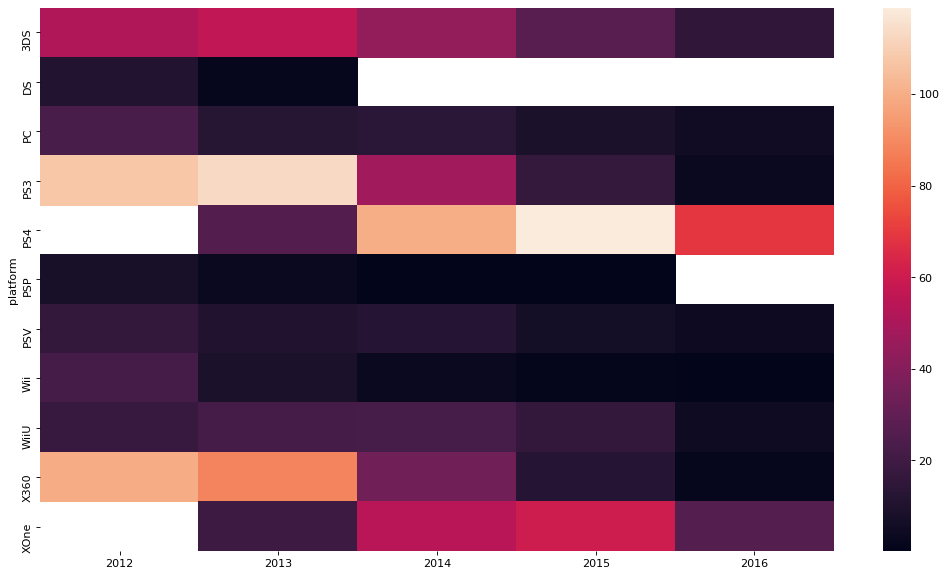

In [32]:
# Построение графика
plt.figure(figsize=(16,9), dpi= 80)
sns.heatmap(dynamic_lead_platform)

Как видно из таблицы и графика, игры для PSP и Nintendo DS перестали выпускать в 2016 и 2014 году соответственно. Из оставшихся платформ самые высокие показатели показывают PlayStation 4 и XBOX One, хотя у обеих консолей идет спад продаж (у XB сильнее). Еще можно выделить Nintendo 3DS, хоть у приставки идет "закат", но все же суммарные продажи игр на этой платформе чуть меньше, чем суммарные продажи игр на остальных платформах, за исключением лидеров PS4 и XBOX One.

### Выберите несколько потенциально прибыльных платформ.

По результатам полученным выше, Отбираем для дальнейшего изученения следющие платформы: PlayStation 4, XBOX One и Nintendo 3DS.

Создадим новую базу данных только для трех наших актуальных платформ

In [33]:
# Список с названиями актуальных платформ 
actual_platform = ['3DS', 'PS4', 'XOne']
# Создание нового датафрейма
actual_platform_data = actual_data.query('platform == @actual_platform')
actual_platform_data.reset_index(inplace=True, drop=True)
actual_platform_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score_replace,user_score_replace,replaced_rating,sum_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,70,7.1,T,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,73,7.6,T,14.60
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,73,7.6,T,11.68
4,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78,7.2,E,9.90
...,...,...,...,...,...,...,...,...,...,...,...,...
1030,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,67,7.1,T,0.01
1031,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,T,0.01
1032,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,67,7.1,T,0.01
1033,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,67,7.1,M,0.01


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишем результат.

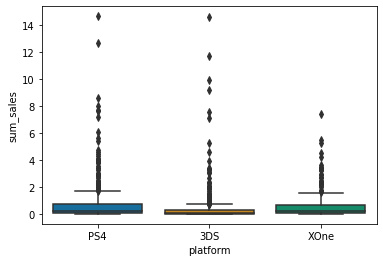

In [34]:
# Построение диаграммы размаха
sns.boxplot(y='sum_sales', x='platform', 
                 data=actual_platform_data, 
                 palette="colorblind")

Как видно, график практически не информативный из-за большого количества выборосов. Нужно от них избавится. Так как большего всего продаж у нас у PS4, то границу отсечения будем искать по этой платформе. Посмотрим распределение и создадим переменную куда запишем пороговое значение. Выбросы у нас находятся за пределами суммарного 3-го квантиля и 1.5 * IQR (IQR - разница между 3-м т 1-м квантилями)

In [35]:
# Отбираем только платформу PS4
ps4_actual_data = actual_platform_data.query('platform == "PS4"')
# Создаем переменную с описанием столбца суммарных продаж
describe_ps4 = ps4_actual_data['sum_sales'].describe()
# Считаем значения переменной порогового лимита
limit = describe_ps4[6]+1.5*(describe_ps4[6]-describe_ps4[4])
limit

1.7349999999999999

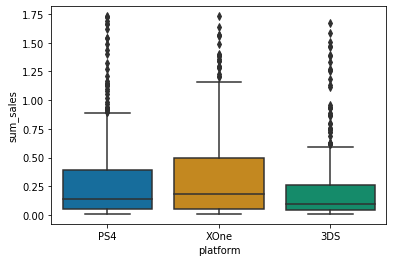

In [36]:
# Убираем выборосы из датафрейма используя полученное пороговое знаение
new_apd = actual_platform_data.query('sum_sales <= @limit')
# Построене графика
sns.boxplot(y='sum_sales', x='platform', 
                 data=new_apd, 
                 palette="colorblind")

Как видим, в среднем на XBOX One игры расходятся большим числом копий, а меньше всего на Nintendo 3DS. На всех платформах большое число выбросов, что говорит о большом коичестве игр, которые продаются намного лучше чем большинство остальных. Медианное значение у всех трех платформ не сильно различается между собой и расположено ближе к 1-му квантилю.


##### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Самой популярной является PS4, у нее больше всего продаж, ее и возьмем для анализа. Начнем с рассмотрения влияния отзывов критиков на продажи. Построим график на котором будет по одной оси идти продажи, а по другой - оценки критиков.

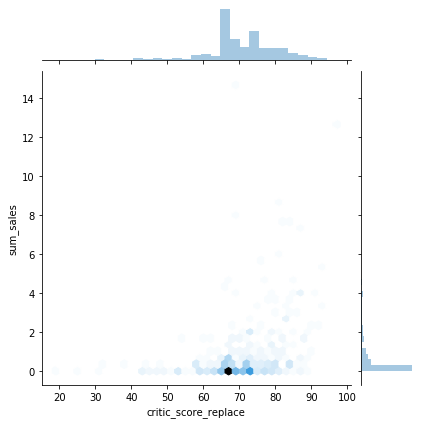

In [37]:
# Построение графика
sns.jointplot(x='critic_score_replace', 
              y='sum_sales', 
              data=ps4_actual_data, 
              kind='hex' 
)

На графике мы можем заметить, что рост продаж начинается с оценок 65-67 баллов. И чем выше оценка тем больше вероятность что игра будет продаваться большим числом копий.

Посмотрим как влияют оценки пользователей на продажи.

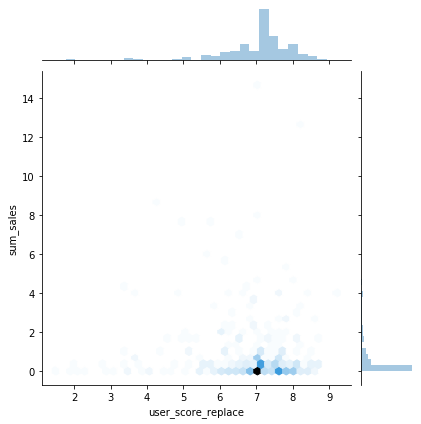

In [38]:
# Построение графика
sns.jointplot(x='user_score_replace', 
              y='sum_sales', 
              data=ps4_actual_data, 
              kind='hex' 
)

Как видим оценки пользателей приактически не влияют на продажи.

А теперь построим диаграмму рассеяния и посмотрим есть ли зависимость между оценками критиков и пользователей к велечине продаж.

<Figure size 1280x720 with 0 Axes>

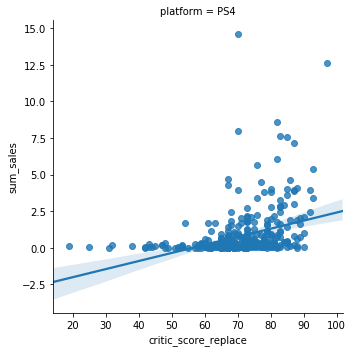

In [39]:
# Построение графика
plt.figure(figsize=(16,9), dpi= 80)
sns.lmplot(x = 'critic_score_replace', 
           y = 'sum_sales', 
           data = ps4_actual_data, 
           hue = 'platform', 
           col = 'platform'
          )

Как видно из графика, между оценками критиков и количеством продаж есть небольшая положительная корреляция. Это означает что чем выше оценка критика, то игра прожается чуть лучше.

Посмотрим, как оценки пользователей влияют на наше распределение.

<Figure size 1280x720 with 0 Axes>

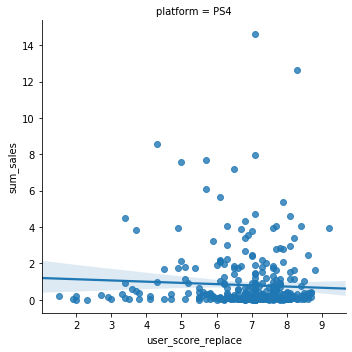

In [40]:
plt.figure(figsize=(16,9), dpi= 80)
sns.lmplot(x = 'user_score_replace', 
           y = 'sum_sales', 
           data = ps4_actual_data, 
           hue = 'platform', 
           col = 'platform'
          )

А вот с оценками пользователей, корреляция близка к нулю, имеет слегка отрицательный уклон. Необычная тенденция. Видимо маркетологи у студий разработки игр работают намного лучше разработчиков, раз успешно продают не всегда качественный продукт.

Сделаем и числовые рассчеты корреляции обоих показателей.

In [41]:
# Рассчет корреляции между оценками критиков и количеством продаж
ps4_actual_data['critic_score_replace'].corr(ps4_actual_data['sum_sales'])

0.3523578766756191

In [42]:
# Рассчет корреляции между оценками игроков и количеством продаж
ps4_actual_data['user_score_replace'].corr(ps4_actual_data['sum_sales'])

-0.05028536090348881

Как видно было на графиках ранее, мы получили числовое подтверждение нашим выводам:

- корреляция между оценками критиков и уровнем продаж положительная, сотавляет 0,35.
- корреляция между оценками игроков и уровнем продаж отрицательаня, составляет -0,05, что практически равно нулю. А значит оба показателя никак не влияют на значения друг друга.

Осталось посмотреть на жанры, а точнее на распределение игр по жанрам. Для этого построим диаграммы размаха по каждому жанру. Посмотрим какие из жанров более прибыльные, а какие менее. А может быть вообще отличий не будет.

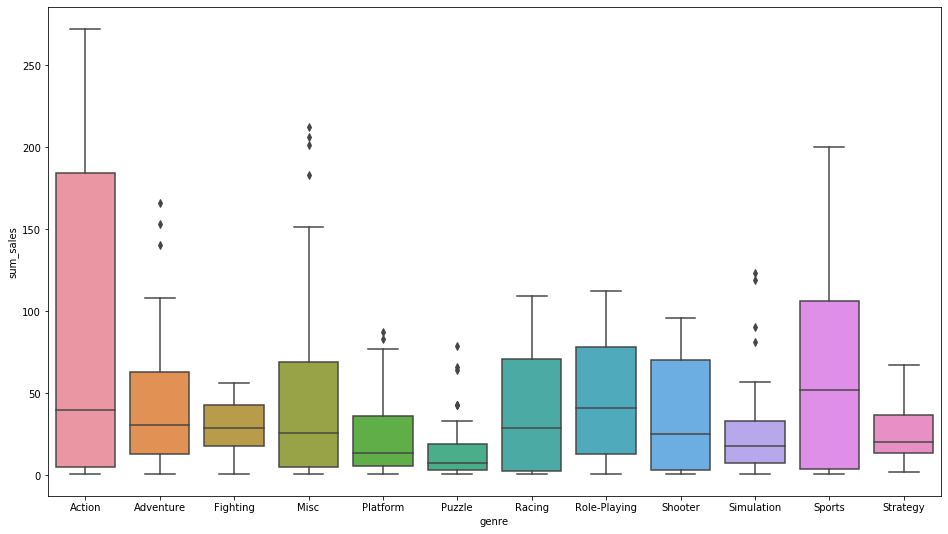

In [43]:
# ПОдготовка данных для построения графика
summury_genre_sales = (good_data\
       .groupby('genre')\
       .filter(lambda x : len(x) > 500)\
       .groupby(['genre','year_of_release'])\
       .size().to_frame('sum_sales')\
       .reset_index()
      )
# Построение графика
plt.figure(figsize=(16, 9))
sns.boxplot(data=summury_genre_sales, x='genre', y='sum_sales')

Сразу бросается в глаза явный фаворит - Action, на втором месте жанр - Sport. Самый нишевый жанр - Puzzle, самые маленькие продажи. Так же к не очень популярным можно отнести Fighting, Simulation, Strategy. 

## Вывод

Как итог получаем что у нас есть неоднозначная динамика, сначала отсчета был рост, временами взрывной, но посление несколько лет был спад. От части это вызвано тем, что срежний срок жизни игровой платформы 8-9 лет, и для части платформ перестали выпускать игры, ввиду их технологического устаревания, а новые платформы появляются в меньшем количестве, ввиду высокой технологической стоимости. Из наиболее актулаьных платформ на 2017 год - PS4 и XBOX One, самые высокие продажи и обе платформы, не считая персонального компьютера, самые технологичные в плане "железа". Оценки критиков напрямую влияют на продажи игровых копий, хотя и не оцень сильно. А вот рейтинг игроков никак не влияет на продажи. От себя добавлю, что сам не смотрю рейтинги вообще. Достаточно посмотреть прохождение игры 30-60 минут и понять, хочешь ты игру купить или нет. Среди жанров можно выделить наиболее популярные: экшн, спорт, разное, ролевые игры, шутеры и гонки. Наименее популярные, или можно сказать нишевые, это пазлы, файтинги, симуляторы, стратегии. И за частую эти жанры присутствуют только на определенных платформах и поэтому их охват более ограничен по сравнению с кросс-платформенными проектами.

## Шаг 4. Портрет пользователя каждого региона

Для составление портрета, в начале определим для каждого региона:
- Самые популярные платформы (топ-5);
- Самые популярные жанры (топ-5).

После определения, посмотрим, если различия в долях. Так же интересно, есть ли влияние у рейтинга ESRB на продажи в отдельном регионе.

Начнем с определения самых популярных платформ.

In [44]:
# Создание сводной таблицы топ-5 платформ по продажам в Америке
na_popular_platforms = good_data.pivot_table(index='platform', 
                                             values='na_sales',
                                             aggfunc='sum'
                                            ).sort_values('na_sales', ascending=False).head()
# Рассичтываем общую сумму продаж в Америке
sum_na_sales = good_data['na_sales'].sum()
# Формируем таблицу с 2 колонками - суммарные продажи для каждой платформы и доли от общих продаж
na_popular_platforms['share_sales'] = na_popular_platforms['na_sales'] / sum_na_sales
na_popular_platforms['share_sales'] = na_popular_platforms['share_sales'].mul(100).round(1)
na_popular_platforms

,na_sales,share_sales
platform,,
X360,595.74,13.7
PS2,572.92,13.2
Wii,486.87,11.2
PS3,390.13,9.0
DS,380.31,8.8


In [45]:
# Создание сводной таблицы топ-5 платформ по продажам в Европе
eu_popular_platforms = good_data.pivot_table(index='platform', 
                                             values='eu_sales',
                                             aggfunc='sum'
                                            ).sort_values('eu_sales', ascending=False).head()
# Рассичтываем общую сумму продаж в Европе
sum_eu_sales = good_data['eu_sales'].sum()
# Формируем таблицу с 2 колонками - суммарные продажи для каждой платформы и доли от общих продаж
eu_popular_platforms['share_sales'] = eu_popular_platforms['eu_sales'] / sum_eu_sales
eu_popular_platforms['share_sales'] = eu_popular_platforms['share_sales'].mul(100).round(1)
eu_popular_platforms

,eu_sales,share_sales
platform,,
PS2,332.63,13.9
PS3,327.21,13.6
X360,268.32,11.2
Wii,258.32,10.8
PS,212.39,8.9


In [46]:
# Создание сводной таблицы топ-5 платформ по продажам в Японии
jp_popular_platforms = good_data.pivot_table(index='platform', 
                                             values='jp_sales',
                                             aggfunc='sum'
                                            ).sort_values('jp_sales', ascending=False).head()
# Рассичтываем общую сумму продаж в Японии
sum_jp_sales = good_data['jp_sales'].sum()
# Формируем таблицу с 2 колонками - суммарные продажи для каждой платформы и доли от общих продаж
jp_popular_platforms['share_sales'] = jp_popular_platforms['jp_sales'] / sum_jp_sales
jp_popular_platforms['share_sales'] = jp_popular_platforms['share_sales'].mul(100).round(1)
jp_popular_platforms

,jp_sales,share_sales
platform,,
DS,175.02,13.6
PS,139.78,10.8
PS2,137.54,10.7
SNES,116.55,9.0
3DS,100.62,7.8


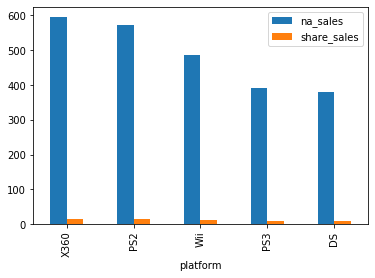

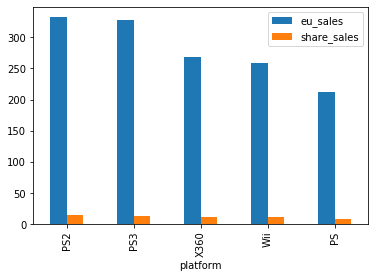

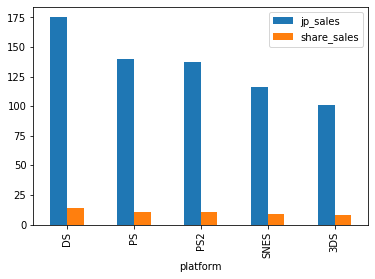

In [47]:
# Построение графиков
na_popular_platforms.plot(kind='bar')
eu_popular_platforms.plot(kind='bar')
jp_popular_platforms.plot(kind='bar')

##### Вывод по популярным платформам

Для Америки самой пополярной платформой является XBOX 360 - поддерживают отечественного производителя))). Но в затылок Майкрософт упорно дышит японская Сони, с ее PS2. На эти 2 приставки приходится четверть всех продаж. А суммарная доля по продажам топ-5 платформ - 55,9%.

Для Европы расклад несколько другой. Там первые 2 место забрала Сони, с ее PS2 и PS3, забирая 27,5% рынка. У Майкрософт же только третье место и 11,2% рынка. Суммарная доля по продажам топ-5 платформ - 58,4%.

А вот Япония и правда "Другой мир". Лидурет на рынке Нинтендо. А Сони, с ее PS2 занимает лишь скромную 3 позицию. Майкрософт же вообще не попали в топ-5 платформ. Это связано с тем, что японцы предпочитают специфичный жанр игр и издается он далеко не на всех платформах, отсюда и лидерующие позиции игровых Нинтендо.

А что же у нас с жанрами?

In [48]:
# Создание сводной таблицы топ-5 жанров по продажам в Америке
na_popular_genres = good_data.pivot_table(index='genre', 
                                             values='na_sales',
                                             aggfunc='sum'
                                            ).sort_values('na_sales', ascending=False).head()
# Рассичтываем общую сумму продаж в Америке
sum_na_sales = good_data['na_sales'].sum()
# Формируем таблицу с 2 колонками - суммарные продажи для каждой платформы и доли от общих продаж
na_popular_genres['share_sales'] = na_popular_genres['na_sales'] / sum_na_sales
na_popular_genres['share_sales'] = na_popular_genres['share_sales'].mul(100).round(1)
na_popular_genres

,na_sales,share_sales
genre,,
Action,863.17,19.9
Sports,671.20,15.5
Shooter,584.83,13.5
Platform,444.44,10.2
Misc,399.57,9.2


In [49]:
# Создание сводной таблицы топ-5 жанров по продажам в Европе
eu_popular_genres = good_data.pivot_table(index='genre', 
                                             values='eu_sales',
                                             aggfunc='sum'
                                            ).sort_values('eu_sales', ascending=False).head()
# Рассичтываем общую сумму продаж в Европе
sum_eu_sales = good_data['eu_sales'].sum()
# Формируем таблицу с 2 колонками - суммарные продажи для каждой платформы и доли от общих продаж
eu_popular_genres['share_sales'] = eu_popular_genres['eu_sales'] / sum_eu_sales
eu_popular_genres['share_sales'] = eu_popular_genres['share_sales'].mul(100).round(1)
eu_popular_genres

,eu_sales,share_sales
genre,,
Action,510.99,21.3
Sports,371.33,15.5
Shooter,314.52,13.1
Racing,234.49,9.8
Misc,210.60,8.8


In [50]:
# Создание сводной таблицы топ-5 жанров по продажам в Японии
jp_popular_genres = good_data.pivot_table(index='genre', 
                                             values='jp_sales',
                                             aggfunc='sum'
                                            ).sort_values('jp_sales', ascending=False).head()
# Рассичтываем общую сумму продаж в Японии
sum_jp_sales = good_data['jp_sales'].sum()
# Формируем таблицу с 2 колонками - суммарные продажи для каждой платформы и доли от общих продаж
jp_popular_genres['share_sales'] = jp_popular_genres['jp_sales'] / sum_jp_sales
jp_popular_genres['share_sales'] = jp_popular_genres['share_sales'].mul(100).round(1)
jp_popular_genres

,jp_sales,share_sales
genre,,
Role-Playing,353.39,27.4
Action,160.14,12.4
Sports,134.93,10.5
Platform,130.71,10.1
Misc,107.02,8.3


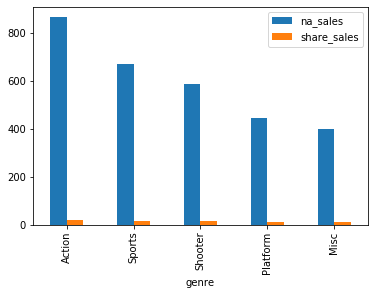

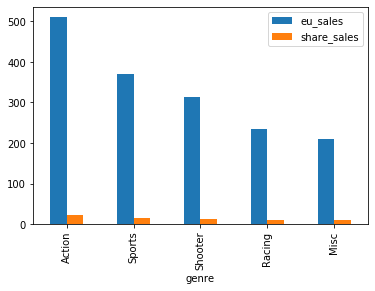

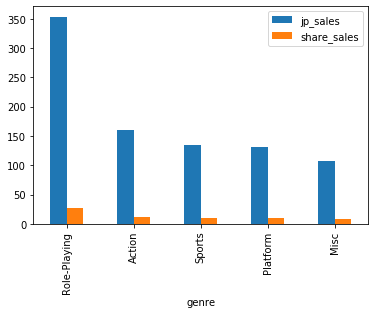

In [51]:
# Построение графиков
na_popular_genres.plot(kind='bar')
eu_popular_genres.plot(kind='bar')
jp_popular_genres.plot(kind='bar')

И с жанрами в разных регионах тоже есть различия. Американцы - нация боевиков и спорта (Если по телевизору показывают боевик - то типичная американщина, один герой спасает весь мир с перестрелками драками и взрывами, так же мало найдется людей которые не слышали про американскую баскебольную лигу NBA и про хоккейную - NHL). Воспитанные на таком контенте люди будут отдавать и в играх предпочтения таким же жанрам. Как итог - первые три позиции занимают Экшн, Спорт и Шутеры.

В Европе похожая картина - все таки сказывается многолетнее влияние Америки. Отличия только с номером 4 - вместо платформеров европейцы предпочитают гоночные симуляторы. Гоночные увелечения европейцев давно известны, Формула 1 - считается "королевской" гонкой.

А вот Япония опять "не от мира сего". Шутеры они не жалуют, а вот настоящая страсть у них к Ролевым играм. Это целая часть культуры их манга и аниме, и в ролевых играх (RPG) даже есть целый жанр основанный на японском подходе - JRPG.

Осталось выяснить есть ли у возрастного рейтинга ESRB влияние на продажи. Для этого подготовим сводную таблицу где будут значения суммарных продаж в целом, суммарных продаж в отдельных регионах и доли от продаж по каждому возрастному рейтингу.

In [52]:
# Создание сводной таблицы по суммарным продажам во всех регионах
all_esrb_rating = good_data.pivot_table(index='replaced_rating', 
                                             values='sum_sales',
                                             aggfunc='sum'
                                            ).sort_values('sum_sales', ascending=False)
# Рассичтываем общую сумму продаж во всех регионах
sum_sales = good_data['sum_sales'].sum()
# Формируем таблицу с 2 колонками - суммарные продажи и доли от общих продаж
all_esrb_rating['share_sum_sales'] = all_esrb_rating['sum_sales'] / sum_sales
all_esrb_rating['share_sum_sales'] = all_esrb_rating['share_sum_sales'].mul(100).round(1)
all_esrb_rating

,sum_sales,share_sum_sales
replaced_rating,,
E,3280.75,37.2
T,2656.27,30.1
M,1462.53,16.6
E10+,1411.07,16.0
AO,1.96,0.0
EC,1.75,0.0
RP,0.04,0.0


In [53]:
# Создание сводной таблицы по суммарным продажам в Америке
na_esrb_rating = good_data.pivot_table(index='replaced_rating', 
                                             values='na_sales',
                                             aggfunc='sum'
                                            ).sort_values('na_sales', ascending=False)
# Рассичтываем общую сумму продаж в Америке
sum_na_sales = good_data['na_sales'].sum()
# Формируем таблицу с 2 колонками - суммарные продажи и доли от общих продаж
na_esrb_rating['share_na_sales'] = na_esrb_rating['na_sales'] / sum_na_sales
na_esrb_rating['share_na_sales'] = na_esrb_rating['share_na_sales'].mul(100).round(1)
na_esrb_rating

,na_sales,share_na_sales
replaced_rating,,
E,1697.93,39.1
T,1248.39,28.8
M,742.89,17.1
E10+,649.42,15.0
EC,1.53,0.0
AO,1.26,0.0
RP,0.00,0.0


In [54]:
# Создание сводной таблицы по суммарным продажам в Европе
eu_esrb_rating = good_data.pivot_table(index='replaced_rating', 
                                             values='eu_sales',
                                             aggfunc='sum'
                                            ).sort_values('eu_sales', ascending=False)
# Рассичтываем общую сумму продаж в Европе
sum_eu_sales = good_data['eu_sales'].sum()
# Формируем таблицу с 2 колонками - суммарные продажи и доли от общих продаж
eu_esrb_rating['share_eu_sales'] = eu_esrb_rating['eu_sales'] / sum_eu_sales
eu_esrb_rating['share_eu_sales'] = eu_esrb_rating['share_eu_sales'].mul(100).round(1)
eu_esrb_rating

,eu_sales,share_eu_sales
replaced_rating,,
E,885.95,36.9
T,656.52,27.4
M,480.00,20.0
E10+,376.46,15.7
AO,0.61,0.0
EC,0.11,0.0
RP,0.03,0.0


In [55]:
# Создание сводной таблицы по суммарным продажам в Японии
jp_esrb_rating = good_data.pivot_table(index='replaced_rating', 
                                             values='jp_sales',
                                             aggfunc='sum'
                                            ).sort_values('jp_sales', ascending=False)
# Рассичтываем общую сумму продаж в Японии
sum_jp_sales = good_data['jp_sales'].sum()
# Формируем таблицу с 2 колонками - суммарные продажи и доли от общих продаж
jp_esrb_rating['share_jp_sales'] = jp_esrb_rating['jp_sales'] / sum_jp_sales
jp_esrb_rating['share_jp_sales'] = jp_esrb_rating['share_jp_sales'].mul(100).round(1)
jp_esrb_rating

,jp_sales,share_jp_sales
replaced_rating,,
T,536.95,41.6
E,425.01,32.9
E10+,265.10,20.5
M,63.58,4.9
AO,0.00,0.0
EC,0.00,0.0
RP,0.00,0.0


In [56]:
# Используя метод merge объединяем полученные 5 таблицы в одну
all_rating = all_esrb_rating.merge(na_esrb_rating, how='left', on='replaced_rating')
all_rating = all_rating.merge(eu_esrb_rating, how='left', on='replaced_rating')
all_rating = all_rating.merge(jp_esrb_rating, how='left', on='replaced_rating')
all_rating

,sum_sales,share_sum_sales,na_sales,share_na_sales,eu_sales,share_eu_sales,jp_sales,share_jp_sales
replaced_rating,,,,,,,,
E,3280.75,37.2,1697.93,39.1,885.95,36.9,425.01,32.9
T,2656.27,30.1,1248.39,28.8,656.52,27.4,536.95,41.6
M,1462.53,16.6,742.89,17.1,480.00,20.0,63.58,4.9
E10+,1411.07,16.0,649.42,15.0,376.46,15.7,265.10,20.5
AO,1.96,0.0,1.26,0.0,0.61,0.0,0.00,0.0
EC,1.75,0.0,1.53,0.0,0.11,0.0,0.00,0.0
RP,0.04,0.0,0.00,0.0,0.03,0.0,0.00,0.0


Ну посмотрим относительно мирового распределения как возрастной рейтинг влияет на продажи в каждом регионе.

RP: «Rating Pending» — «Рейтинг ожидается», EC: «Early childhood» — «Для детей младшего возраста» и AO: «Adults Only 18+» — «Только для взрослых»:
Таких игр у нас нас в нашей базе практически нет, их продажи минимальны и доли стоставляют менее 0,1%.

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. В Америке продажи с таким рейтингом чуть выше на 1,3%, чем в целом по всем регионам, а вот в Европе и Японии ниже - 0,3% и 4,3% соответственно.

«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. В Америке и Европе игры с таким рейтингом продаются хуже, чем в целом по всем регионам на 1,0% и 0,3% соответственно. А вот в Японии это более предпочтительный возрасной рейтинг (больше на 4,5%).

«T» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. В Америке и Европе игры с таким рейтингом продаются хуже, чем в целом по всем регионам на 1,3% и 2,7% соответсвенно. А вот в Японии игры с таким рейтингом самые продаваемые - на 11,5% выше продажи.

«M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. А вот с этой категорией ситуация обратная предыдущим двум. В Америке и Европе игры с таким рейтингом продаются лучше, чем в целом по всем регионам на 0,5% и 3,4% соответсвенно. А вот в Японии игры с таким рейтингом не очень жалуют - продажи ниже на 11,7%.

Самые универсальные жанры это: Е, Е10+ и Т.

## Шаг 5. Проверка гипотез

Есть две гипотезы которые нужно проверить:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные;

При проверке гипотез пороговое значение alpha зададим равным 0,05

#### Сформулируем основные и альтернативные гипотезы
Основная гипотеза:
- Средние пользовательские рейтинги платформ Xbox One и PC совпадают

Альтернативная гипотеза:
- Средние пользовательские рейтинги платформ Xbox One и PC различаются

Основная гипотеза:
- Средние пользовательские рейтинги жанров Action и Sports совпадают

Альтернативная гипотеза:
- Средние пользовательские рейтинги жанров Action и Sports различаются

#### критерий использовали для проверки гипотез

По сути нам нужно использовать гипотезы о равенстве средних двух генеральных совокупностей. У нас выборки имеют большой размер, и благодаря центральной предельной теореме их выборочные средние распределены нормально. Поэтому можно использовать t-test даже для ненормальных выборок. Для проверки гипотез мы будем использовать двухстроннюю проверку, так как нам не важно будет ли значение первой совокупности больше или меньше значения второй совокупности. Нам важно понять, будут ли они различаться или они будут совпадать.

Для проверки первой гипотезы нужно создать выборки:
- Cредние пользовательские рейтинги платформы XBOX One
- Cредние пользовательские рейтинги платформы PC

Для проверки второй гипотезы нужно создать выборки:
- Средние пользовательские рейтинги жанра Action
- Средние пользовательские рейтинги жанра Sports


### Проверка первой гипотезы: 
- Средние пользовательские рейтинги платформ Xbox One и PC совпадают.

Cоздаем выборки для проверки первой гипотезы

In [57]:
# создаем выборки для проверки гипотез
user_rating_xbox = good_data.query('platform == "XOne"')
user_rating_xbox = user_rating_xbox.reset_index()
mean_user_rating_xbox = user_rating_xbox['user_score_replace']

user_rating_pc = good_data.query('platform == "PC"')
user_rating_pc = user_rating_pc.reset_index()
mean_user_rating_pc = user_rating_pc['user_score_replace']

In [58]:
alpha = .05

results = st.ttest_ind(mean_user_rating_xbox, mean_user_rating_pc, equal_var = False)
# используется параметр equal_var, так как у нас разное количество значений в выборках

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.201686920752534e-06
Отвергаем нулевую гипотезу


Результат работы статистичкого теста выдает значение p-значение = 6 на 10 в -6 степени, что стремится к нулю, меньше порогового 0.05, а это означает что мы отвергаем нашу гипотезу о равенсте средних пользовательских рейтингов платформ Xbox One и PC.
Не имея всех данных мы не можем точно сказать сопадает ли это значение или нет, но имея те данные что нам прислал заказчик, наша гипотеза а равенстве не подтвердилась, и мы делаем вывод что средние пользовательские рейтинги платформ Xbox One и PC различаются.

### Проверка второй гипотезы: 
- Средние пользовательские рейтинги жанров Action и Sports совпадают.

Cоздаем выборки для проверки первой гипотезы.

In [59]:
# создаем выборки для проверки гипотез
user_rating_action = good_data.query('genre == "Action"')
user_rating_action = user_rating_action.reset_index()
mean_user_rating_action = user_rating_action['user_score_replace']

user_rating_sports = good_data.query('genre == "Sports"')
user_rating_sports = user_rating_sports.reset_index()
mean_user_rating_sports = user_rating_sports['user_score_replace']

In [60]:
alpha = .05

results = st.ttest_ind(mean_user_rating_action, mean_user_rating_sports, equal_var = False)
# используется параметр equal_var, так как у нас разное количество значений в выборках

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0006828544673947404
Отвергаем нулевую гипотезу


Вторую гипотезу тоже не можем принять, p-значение = 0.0006828544673947404, меньше порогового 0.05
Вывод: Средние пользовательские рейтинги жанров Action и Sports отличаются.

## Вывод

У нас не получилось подтвердить ни одну из наших двух гипотез о равенстве двух совокупностей. Как итог будем счатать что средние пользовательские рейтинги платформ Xbox One и PC различаются и средние пользовательские рейтинги жанров Action и Sports отличаются.

## Шаг 6. Общий вывод

Нужно было выявить определяющие успешност игру составляющие. Был проведен большой анализ, обработано много данных и получены следующие выводы:
- средний срок "жизни" игровой платформы 8-9 лет. И нужно отдавать предпочтение тем игровым платформам, которые появились на рынке 1-2 года назад. Именно на таких платформах возможны максимальные продажи;
- регион продажи важен, так как в разных регионах "господствуют" разные платформы и разные жанры игр. В частности на американских и европейских рынках лидирующие позиции занимают Microsoft и Sony, а самые популярные жанры совпадают - Action, Sport и Shooterы. А вот японский рынок рахительно отличается. Там более популярна платформа Nintendo, на втором месте Sony, а из игр больше всего предпочитают Ролевые игры, хотя Action и Sport занимают 2 и 3 место по популярности. Итоговый вывод: самая перспективная платформа PS4, а жанры Action и Sport;
- Возрастной рейтинг тоже оказывает влияние на продажи, самые перспективные: Е, Е10+ и Т;
- А вот рейтинги мало влияют на продажи. Пользовательские рейтинги вообще никак не влияют, оценки критиков могут повлиять, то положительная корреляция не очень сильная, поэтому и влияние не очень большое. А при проверке гипотез мы выявили что пользовательские оценки на платформах отличаются (исследовали XBOX One и PC), и что по жанрам тоже есть различия в оценках (Action и Sport). Как вывод - оценки это наименее значимый критерий успешности игры.

Из все выше перечисленного комапнии рекомендовано сделать ставку и спланировать рекламные кампании на: игры для PS4, жанра Action или Sport, с возрастным рейтингом от E до T. Для европейского и американского рынка добавить игры от XBOX One, для азиатского игры для Nintendo.